# Trabalho 1 - SEP
## Abaixo segue o diagrama unifilar simplificado do sistema.

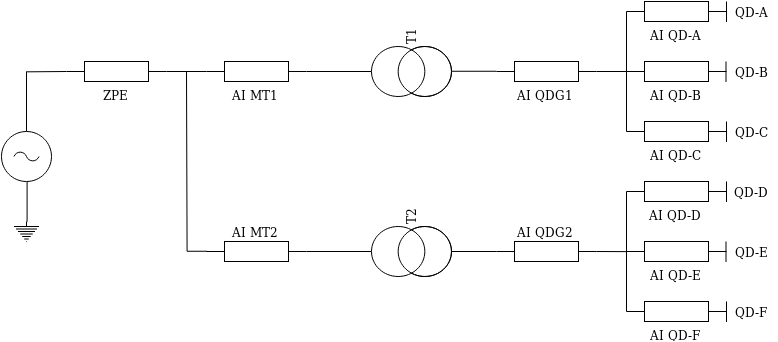

In [513]:
import cmath
import math

In [514]:
# Bases

Sb = 100*10**6
Vbmt = 13800
Vbbt1 = 220 # Tensão base do transformador 1
Vbbt2 = 380 # Tensão base do transformador 2

Ibmt = Sb/(math.sqrt(3)*Vbmt)
Ibbt1 = Sb/(math.sqrt(3)*Vbbt1) # Corrente base TF-1
Ibbt2 = Sb/(math.sqrt(3)*Vbbt2) # Corrente base TF-2

Zbmt = (Vbmt**2)/Sb
Zbbt1 = (Vbbt1**2)/Sb
Zbbt2 = (Vbbt2**2)/Sb

In [515]:
def calcula_impedancia(bitola_mm, d_m):
    
    impedancias = {"16": complex(1.3899, 0.1173)/1000, "25": complex(0.8891, 0.1164)/1000, 
                   "35": complex(0.6353, 0.1128)/1000, "70": complex(0.3184, 0.1096)/1000, 
                   "95": complex(0.2352, 0.1090)/1000, "3x70": complex(0.6353, 0.1128)/(3*1000), 
                   "50": complex(0.4450, 0.1127)/1000, "2x70": complex(0.6353, 0.1128)/(2*1000), 
                   "4x120": complex(0.1868, 0.1076)/(4*1000)}
    
    return impedancias[bitola_mm]*d_m

In [516]:
# Impedâncias

Z1 = complex(0.3703, 1.3690)

Zcmt1 = complex(1.534, 0.177)*11/1000 # Duto conrrugado
Zcmt2 = complex(1.534, 0.177)*45/1000 # Duto conrrugado
Zcbta = calcula_impedancia("25", 45)
Zcbtb = calcula_impedancia("35", 45)
Zcbtc = calcula_impedancia("70", 55)
Zcbtd = calcula_impedancia("95", 80)
Zcbte = calcula_impedancia("3x70", 50)
Zcbtf = calcula_impedancia("50", 95)
Zcbtqgd1 = calcula_impedancia("2x70", 29)
Zcbtqgd2 = calcula_impedancia("4x120", 14)

# Impedâncias PU

Zcmt1pu = Zcmt1/Zbmt
Zcmt2pu = Zcmt2/Zbmt
Zcbtapu = Zcbta/Zbbt1
Zcbtbpu = Zcbtb/Zbbt1
Zcbtcpu = Zcbtc/Zbbt1
Zcbtdpu = Zcbtd/Zbbt2
Zcbtepu = Zcbte/Zbbt2 
Zcbtfpu = Zcbtf/Zbbt2
Zcbtqgd1pu = Zcbtqgd1/Zbbt1 
Zcbtqgd2pu = Zcbtqgd2/Zbbt2 


In [517]:
def calcula_impedancia_transformador(Sn, Z, Pcobre, Sb = 100*10**6):
    # Retorna a impedância do tranformador, já na base desejada
    R = Pcobre/Sn
    Xl = math.sqrt(((Z/100)**2) - (R**2))
    
    return complex(R,Xl)*Sb/Sn

In [518]:
# Impedância dos transformadores

Ztr1pu = calcula_impedancia_transformador(150*10**3, 3.5, 545)
Ztr2pu = calcula_impedancia_transformador(750*10**3, 6, 9500)

In [519]:
def calcula_s(pot, fp = 0, ativa = True):
    if ativa:
        S = pot/fp
        phi = math.acos(fp)
        return cmath.rect(S, phi)
    
    else:
        phi = math.acos(fp)
        return cmath.rect(pot, phi)

In [520]:
# Cargas
Sqda = calcula_s(33*10**3, 0.87)
Sqdb = calcula_s(46*10**3, 0.89, False)
Sqdc = calcula_s(71*10**3, 0.82, False)
Sqdd = calcula_s(173*10**3, 0.85, False)
Sqde = calcula_s(425*10**3, 0.87, False)
Sqdf = 0#calcula_s(-120*10**3, -1)

# Passando para PU
Sqdapu = Sqda/Sb 
Sqdbpu = Sqdb/Sb 
Sqdcpu = Sqdc/Sb 
Sqddpu = Sqdd/Sb 
Sqdepu = Sqde/Sb 
Sqdfpu = Sqdf/Sb 

# Bancos de Capacitores
Qqda = complex(0, 3*10**3)
Qqdb = complex(0, 2*10**3)
Qqdc = complex(0, 12.5*10**3)
Qqdd = complex(0, 20*10**3)
Qqde = complex(0, 40*10**3)
Qqdf = complex(0, 0)
Qqdg1 = complex(0, 20*10**3)
Qqdg2 = complex(0, 60*10**3)

# Passando para PU
Qqdapu = Qqda/Sb 
Qqdbpu = Qqdb/Sb 
Qqdcpu = Qqdc/Sb  
Qqddpu = Qqdd/Sb  
Qqdepu = Qqde/Sb  
Qqdfpu = Qqdf/Sb 
Qqdg1pu = Qqdg1/Sb 
Qqdg2pu = Qqdg2/Sb

In [521]:
# Controle de Bancos de capacitores
bancos = {"Qqda": False,
          "Qqdb": False,
          "Qqdc": False,
          "Qqdd": False,
          "Qqde": False,
          "Qqdf": False,
          "Qqdg1": False,
          "Qqdg2": False}

potencias = dict()

if bancos["Qqda"]: 
    potencias["Sqdapu"] = Sqdapu + Qqdapu 
else:
    potencias["Sqdapu"] = Sqdapu
if bancos["Qqdb"]: 
    potencias["Sqdbpu"] = Sqdbpu + Qqdbpu 
else:
    potencias["Sqdbpu"] = Sqdbpu
if bancos["Qqdc"]: 
    potencias["Sqdcpu"] = Sqdcpu + Qqdcpu 
else:
    potencias["Sqdcpu"] = Sqdcpu
if bancos["Qqdd"]: 
    potencias["Sqddpu"] = Sqddpu + Qqddpu 
else:
    potencias["Sqddpu"] = Sqddpu
if bancos["Qqde"]: 
    potencias["Sqdepu"] = Sqdepu + Qqdepu 
else:
    potencias["Sqdepu"] = Sqdepu
if bancos["Qqdf"]: 
    potencias["Sqdfpu"] = Sqdfpu + Qqdfpu 
else:
    potencias["Sqdfpu"] = Sqdfpu
    
if bancos["Qqdg1"]: 
    potencias["Sqdg1"] = Qqdg1pu 
else:
    potencias["Sqdg1"] = 0 + 0j
if bancos["Qqdg2"]: 
    potencias["Sqdg2"] = Qqdg2pu 
else:
    potencias["Sqdg2"] = 0 + 0j
    
# Ponto de entrada
# Valor inicial que deve ser desconsiderado
potencias["Spepu"] = 0 + 0j


In [522]:
# Definindo as tensões iniciais
tensoes = { "Vqdapu": complex(1,0),
            "Vqdbpu": complex(1,0),
            "Vqdcpu": complex(1,0),
            "Vqddpu": complex(1,0),
            "Vqdepu": complex(1,0),
            "Vqdfpu": complex(1,0),
            "Vbtt1pu": complex(1,0),
            "Vbtt2pu": complex(1,0), 
            "Vpepu": complex(1,0)}

# Estamos criando um dicionário para as correntes, mas esses valores não são representativos
correntes = { "Iqdapu": complex(1,0),
              "Iqdbpu": complex(1,0),
              "Iqdcpu": complex(1,0),
              "Iqddpu": complex(1,0),
              "Iqdepu": complex(1,0),
              "Iqdfpu": complex(1,0),
              "Ibtt1pu": complex(1,0),
              "Ibtt2pu": complex(1,0), 
              "Ipepu": complex(1,0)}

In [523]:
# Perguntar pq o professor não dividiu por 3 no código exemplo
def calcula_corrente(V, S):
    return S.conjugate()/V

def calcula_correntes():
    for i in zip(correntes, tensoes, potencias):
        correntes[i[0]] = calcula_corrente(tensoes[i[1]], potencias[i[2]])
    
    correntes["Ibtt1pu"] = correntes["Iqdapu"] + correntes["Iqdbpu"] + correntes["Iqdcpu"]
    correntes["Ibtt2pu"] = correntes["Iqddpu"] + correntes["Iqdepu"] + correntes["Iqdfpu"]
    correntes["Ipepu"] = correntes["Ibtt1pu"] + correntes["Ibtt2pu"]
    
calcula_correntes()


In [524]:
# Calcula as quedas de tensão
quedas_tensao = dict()
def calcula_quedas_tensao():
    quedas_tensao["Dzcbta"] = Zcbtapu*correntes["Iqdapu"]
    quedas_tensao["Dzcbtb"] = Zcbtbpu*correntes["Iqdbpu"]
    quedas_tensao["Dzcbtc"] = Zcbtcpu*correntes["Iqdcpu"]
    quedas_tensao["Dzcbtd"] = Zcbtdpu*correntes["Iqddpu"]
    quedas_tensao["Dzcbte"] = Zcbtepu*correntes["Iqdepu"]
    quedas_tensao["Dzcbtf"] = Zcbtfpu*correntes["Iqdfpu"]
    quedas_tensao["Dzcbtqgd1"] = Zcbtqgd1pu*correntes["Ibtt1pu"]
    quedas_tensao["Dzcbtqgd2"] = Zcbtqgd2pu*correntes["Ibtt2pu"]
    quedas_tensao["Dzt1"] = Ztr1pu*correntes["Ibtt1pu"]
    quedas_tensao["Dzt2"] = Ztr2pu*correntes["Ibtt2pu"]
    quedas_tensao["Dzcmt1"] = Zcmt1pu*correntes["Ibtt1pu"]
    quedas_tensao["Dzcmt2"] = Zcmt2pu*correntes["Ibtt2pu"]
    quedas_tensao["Dzpe"] = Z1*correntes["Ipepu"]
    
calcula_quedas_tensao()
    

In [525]:
# Calcula tensões
def calcula_tensoes():
    tensoes["Vpepu"] = 1 - quedas_tensao["Dzpe"]
    tensoes["Vbtt1pu"] = tensoes["Vpepu"] - quedas_tensao["Dzcmt1"] - quedas_tensao["Dzt1"]
    tensoes["Vbtt2pu"] = tensoes["Vpepu"] - quedas_tensao["Dzcmt2"] - quedas_tensao["Dzt2"]
    tensoes["Vqdapu"] = tensoes["Vbtt1pu"] - quedas_tensao["Dzcbtqgd1"] - quedas_tensao["Dzcbta"]
    tensoes["Vqdbpu"] = tensoes["Vbtt1pu"] - quedas_tensao["Dzcbtqgd1"] - quedas_tensao["Dzcbtb"]
    tensoes["Vqdcpu"] = tensoes["Vbtt1pu"] - quedas_tensao["Dzcbtqgd1"] - quedas_tensao["Dzcbtc"]
    tensoes["Vqddpu"] = tensoes["Vbtt2pu"] - quedas_tensao["Dzcbtqgd2"] - quedas_tensao["Dzcbtd"]
    tensoes["Vqdepu"] = tensoes["Vbtt2pu"] - quedas_tensao["Dzcbtqgd2"] - quedas_tensao["Dzcbte"]
    tensoes["Vqdfpu"] = tensoes["Vbtt2pu"] - quedas_tensao["Dzcbtqgd2"] - quedas_tensao["Dzcbtf"]

calcula_tensoes()

cmath.polar(tensoes["Vqdfpu"]*Vbbt2)

(363.9523038237688, -0.04460438277145427)

In [526]:
calcula_correntes()
calcula_quedas_tensao()
calcula_tensoes()

cmath.polar(tensoes["Vqdfpu"]*Vbbt2)

(363.4255322101514, -0.049842026622261504)